<a href="https://colab.research.google.com/github/jplpereira/Ocean_DeepLearning_09_02_2021/blob/main/Ocean_DeepLearning_09_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando a biblioteca Keras

In [1]:
import keras

Importando o banco de dados mnist com os algarismos escritos à mão

In [2]:
from keras.datasets import mnist

Importando a arquitetura da rede neural

In [3]:
from tensorflow.python.keras import Sequential

Dense é o neurônio (base da rede) e Dropout é o regularizador que evita o overfitting

In [4]:
from tensorflow.python.keras.layers import Dense, Dropout

RMSdrop é o otimizador (back propagation)

In [5]:
from tensorflow.compat.v1.keras.optimizers import RMSprop

Importando a função pyplot da biblioteca matplotlib

In [6]:
import matplotlib.pyplot as plt

Carregando os dados de treino e teste

In [7]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

Analisando o dataset e a sua estrutura

In [8]:
print('Quantidade de imagens para treino:', len(x_treino))

Quantidade de imagens para treino: 60000


In [9]:
print('Quantidade de imagens para teste:', len(x_teste))

Quantidade de imagens para teste: 10000


In [10]:
print('Tipo de x_treino:', type(x_treino))

Tipo de x_treino: <class 'numpy.ndarray'>


In [11]:
primeira_imagem = x_treino[0]
primeira_imagem

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
print('A primeira imagem representa o número: ', y_treino[0])

A primeira imagem representa o número:  5


In [13]:
print('Formato da primeira imagem: ', primeira_imagem.shape)

Formato da primeira imagem:  (28, 28)


Mostrando a imagem cujo indice foi escolhido

A imagem representa o número:  8


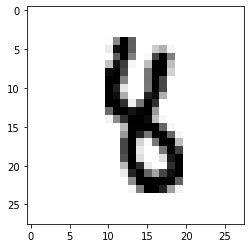

In [14]:
indice = 7000
print('A imagem representa o número: ', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)

Fluxo para construção de rede neural
*   Organizar a camada de entrada (input)
*   Organizar a camada de saída (output)
*   Estruturar a nossa rede neural
*   Treinar o modelo
*   Fazer as previsões

Achatando a matriz de pixels e transformando numa única lista

In [22]:
quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [23]:
print('Quantidade de itens em x_treino[0]: ', len(x_treino[0]))
print(x_treino[0])

Quantidade de itens em x_treino[0]:  784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 2

Normalização dos dados
* 255 vira 1
* 127 vire aproximadamente 0.5
* 0 continue 0